In [1]:
import numpy as np
import pandas as pd
import pyreadr as pyreadr

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import seaborn as sns
import arviz as az

In [2]:
res = {}
for i in range(1,9):
    aux = np.load('./risultati_renboot/saved_results_'+str(i)+'.npz')
    if(i == 1):
        res['intercette'] = aux['intercette']
        res['coefficienti'] = aux['coefficienti']
    else:
        res['intercette'] = np.concatenate([res['intercette'], aux['intercette']])
        res['coefficienti'] = np.concatenate([res['coefficienti'], aux['coefficienti']])
        


In [3]:
res['coefficienti'].shape

(10000, 28)

In [4]:
import open_data
data = open_data.open()
df = data['df']

In [5]:
indici_colonne = df.columns.values[df.columns != 'TARGET'].tolist()

In [6]:
indici_colonne

['EXT_SOURCE_2',
 'DAYS_ID_PUBLISH',
 'DAYS_BIRTH',
 'DAYS_REGISTRATION',
 'DAYS_LAST_PHONE_CHANGE',
 'REGION_POPULATION_RELATIVE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_TOTAL',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OCCUPATION_TYPE_Drivers',
 'OCCUPATION_TYPE_Laborers',
 'OCCUPATION_TYPE_NaN',
 'OCCUPATION_TYPE_Sales staff',
 'OWN_CAR_AGE_10-15',
 'OWN_CAR_AGE_15-20',
 'OWN_CAR_AGE_20-25',
 'OWN_CAR_AGE_25-30',
 'OWN_CAR_AGE_5-10',
 'OWN_CAR_AGE_>=30',
 'OWN_CAR_AGE_NaN',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Widow']

In [7]:
len(indici_colonne)

28

In [8]:
df_saved_results = pd.DataFrame()
i = 0
for col in indici_colonne:
    df_saved_results[col] = res['coefficienti'][:,i]
    i += 1
    
df_saved_results

,EXT_SOURCE_2,DAYS_ID_PUBLISH,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,...,OWN_CAR_AGE_15-20,OWN_CAR_AGE_20-25,OWN_CAR_AGE_25-30,OWN_CAR_AGE_5-10,OWN_CAR_AGE_>=30,OWN_CAR_AGE_NaN,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow
0,-0.426314,-0.141960,-0.130315,-0.061353,-0.175048,-0.129348,-0.012287,0.049180,-0.129813,-0.004951,...,0.051341,0.183662,0.118355,-0.035795,0.492309,0.280410,-0.385729,-0.137593,-0.165595,0.000000
1,-0.461868,-0.204678,-0.052411,-0.080417,-0.203947,-0.122520,0.032044,0.048451,-0.128849,0.000000,...,0.000000,-0.008545,0.000000,-0.139220,0.401601,0.235020,-0.115219,0.057357,-0.177194,-0.159140
2,-0.447730,-0.120219,-0.080372,-0.071612,-0.170017,-0.105792,-0.041672,-0.005681,-0.171184,0.000000,...,-0.171824,-0.066655,0.120465,-0.191244,0.447482,0.313229,-0.134901,-0.179480,0.021702,-0.133586
3,-0.425739,-0.076213,-0.083346,-0.111278,-0.111060,-0.069175,-0.066974,-0.023331,-0.101337,-0.036555,...,0.138970,-0.081532,-0.260981,-0.122996,0.810787,0.329382,-0.391506,-0.273242,-0.270083,-0.291122
4,-0.385374,-0.152245,-0.159018,-0.081783,-0.167625,-0.148720,-0.028571,0.077204,0.000000,-0.083742,...,-0.317167,0.000000,0.000000,-0.076793,0.654178,0.154128,-0.273914,-0.511949,-0.242354,-0.397609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.387814,-0.183719,-0.026099,-0.129522,-0.144301,-0.086069,0.010279,-0.070409,0.000000,-0.153600,...,0.000000,0.044334,-0.019752,-0.212010,0.176616,0.153951,-0.299599,-0.112443,-0.254954,-0.659808
9996,-0.460037,-0.196841,-0.075495,-0.004817,-0.105426,-0.110754,-0.059619,0.020030,0.011043,-0.102816,...,-0.100701,-0.378701,0.025463,-0.217154,0.549581,0.112747,-0.146045,-0.172115,-0.064665,0.234462
9997,-0.346782,-0.193629,-0.126477,-0.104636,-0.174339,-0.103292,-0.054863,0.074717,-0.080708,-0.038145,...,-0.070074,0.000000,-0.070660,-0.209365,0.728958,0.219717,-0.224593,-0.051392,-0.146064,-0.201635
9998,-0.405084,-0.200196,-0.071872,-0.054288,-0.169087,-0.092039,-0.027177,0.020251,0.000000,-0.075670,...,-0.040505,0.002624,0.000000,-0.247811,0.455758,0.178379,-0.129049,-0.061876,0.016911,-0.197103


In [9]:
df

,TARGET,EXT_SOURCE_2,DAYS_ID_PUBLISH,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_TOTAL,AMT_GOODS_PRICE,...,OWN_CAR_AGE_15-20,OWN_CAR_AGE_20-25,OWN_CAR_AGE_25-30,OWN_CAR_AGE_5-10,OWN_CAR_AGE_>=30,OWN_CAR_AGE_NaN,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow
0,0,0.181990,-0.141077,0.951054,-0.138161,0.010246,-0.820835,-1.422014,-0.262419,-1.358109,...,0,0,1,0,0,0,0,0,1,0
1,0,1.214432,0.795336,-0.090038,2.871733,1.168266,-0.154194,-0.091471,-2.004154,0.752837,...,0,0,0,0,0,1,0,0,1,0
2,0,0.872704,-0.207735,-1.157516,-0.172764,2.704195,-0.756359,-1.072036,-2.004154,-0.026252,...,0,0,0,0,0,1,1,0,0,0
3,0,0.996745,-0.956352,0.648985,1.190073,-0.767167,1.677291,-0.441451,-0.262419,-1.061915,...,0,0,0,0,0,1,0,0,0,1
4,0,-2.213495,-0.609604,0.770450,-1.309940,-0.690235,-0.462628,-0.091471,-2.004154,0.856726,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19462,0,-0.426428,-0.335923,-1.203463,1.426676,-0.943974,-0.256361,-1.298128,-0.262419,-1.061915,...,0,0,0,0,0,1,0,0,1,0
19463,0,0.737342,0.164010,-1.030592,-0.959767,0.269383,-1.170965,-0.441451,-0.262419,-0.026252,...,0,0,0,0,0,0,0,0,1,0
19464,1,-1.104427,1.274118,0.251609,0.733723,-0.696984,-1.372400,0.362294,0.318159,-0.026252,...,0,0,0,0,0,1,1,0,0,0
19465,0,0.998757,1.426662,0.163809,1.473701,-1.043850,1.677291,1.239078,0.027870,-1.358109,...,0,0,0,0,0,0,1,0,0,0


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

regr = LogisticRegression(penalty='elasticnet' , l1_ratio=0.305, C=0.225, solver='saga', max_iter=10000)
regr.fit(df.loc[:, df.columns != 'TARGET'].to_numpy(), df['TARGET'].to_numpy())

LogisticRegression(C=0.225, l1_ratio=0.305, max_iter=10000,
                   penalty='elasticnet', solver='saga')

In [11]:
regr.intercept_

array([-3.08661696])

In [12]:
regr.coef_

array([[-0.41840148, -0.17757638, -0.08762456, -0.07335706, -0.15933831,
        -0.09680925, -0.03712537,  0.01562928, -0.06037877, -0.06988868,
         0.        ,  0.        ,  0.01129967,  0.46699138,  0.26860015,
         0.01681947,  0.09780454,  0.19648096, -0.00081359,  0.        ,
         0.        , -0.12401177,  0.47388046,  0.22502137, -0.25598209,
        -0.10458727, -0.13730738, -0.23767875]])

In [13]:
df_risultati = pd.DataFrame()

In [14]:
aux = res['intercette']
name = 'INTERCEPT'

df_risultati['name'] = [name]
df_risultati['mean'] = [np.mean(aux)]
df_risultati['std'] = [np.std(aux)]
df_risultati['25%'] = [np.percentile(aux,25)]
df_risultati['75%'] = [np.percentile(aux,75)]
hdi_interval = az.hdi(aux, hdi_prob=0.95)
df_risultati['HDI_95_Left'] = hdi_interval[0]
df_risultati['HDI_95_Right'] = hdi_interval[1]
df_risultati['p_value'] = [min(np.sum(aux < 0), np.sum(aux > 0))/len(aux)]
df_risultati['CI_left'] = [np.percentile(aux,0.5)]
df_risultati['CI_right'] = [np.percentile(aux,99.5)]        
hdi_interval = az.hdi(aux, hdi_prob=0.99)
df_risultati['HDI_left'] = hdi_interval[0]
df_risultati['HDI_right'] = hdi_interval[1]
df['correct_CI_left'] = 2*regr.intercept_[0] - df_risultati['CI_right']
df['correct_CI_right'] = 2*regr.intercept_[0] - df_risultati['CI_left']
df_risultati

,name,mean,std,25%,75%,HDI_95_Left,HDI_95_Right,p_value,CI_left,CI_right,HDI_left,HDI_right
0,INTERCEPT,-3.095985,0.117818,-3.173614,-3.016512,-3.325218,-2.862166,0.0,-3.400671,-2.797392,-3.406278,-2.807164


In [15]:
regr.coef_[0][0]

-0.4184014773328681

In [16]:
for i in range(res['coefficienti'].shape[1]):
    aux = res['coefficienti'][:,i]
    name = indici_colonne[i]
    hdi_interval = az.hdi(aux, hdi_prob=0.95)
    hdi_interval_2 = az.hdi(aux, hdi_prob=0.99)

    new_row = {
        'name': [name],
        'mean': [np.mean(aux)],
        'std': [np.std(aux)],
        '25%': [np.percentile(aux,25)],
        '75%': [np.percentile(aux,75)],
        'HDI_95_Left': [hdi_interval[0]],
        'HDI_95_Right': [hdi_interval[1]],
        'p_value': [(2*min(np.sum(aux < 0), np.sum(aux > 0)) + np.sum(aux == 0))/len(aux)],
        'CI_left': [np.percentile(aux,0.5)],
        'CI_right': [np.percentile(aux,99.5)],        
        'HDI_left': [hdi_interval_2[0]],
        'HDI_right': [hdi_interval_2[1]],          
        'correct_CI_left': 2*regr.coef_[0][i] - np.percentile(aux,99.5),
        'correct_CI_right': 2*regr.coef_[0][i] - np.percentile(aux,0.5),       
    }
    
    df_risultati = pd.concat([df_risultati, pd.DataFrame(data=new_row)])

df_risultati.set_index('name', inplace=True)

In [17]:
df_risultati

,mean,std,25%,75%,HDI_95_Left,HDI_95_Right,p_value,CI_left,CI_right,HDI_left,HDI_right,correct_CI_left,correct_CI_right
name,,,,,,,,,,,,,
INTERCEPT,-3.095985,0.117818,-3.173614,-3.016512,-3.325218,-2.862166,0.0000,-3.400671,-2.797392,-3.406278,-2.807164,NaN,NaN
EXT_SOURCE_2,-0.418766,0.030521,-0.439487,-0.397852,-0.479951,-0.361701,0.0000,-0.495805,-0.338939,-0.494106,-0.338260,-0.497864,-0.340998
DAYS_ID_PUBLISH,-0.178061,0.035161,-0.201706,-0.154610,-0.249029,-0.111008,0.0000,-0.269395,-0.088919,-0.264756,-0.085908,-0.266234,-0.085758
DAYS_BIRTH,-0.088237,0.038433,-0.113977,-0.062418,-0.162551,-0.011966,0.0185,-0.185988,0.006348,-0.189655,0.001965,-0.181597,0.010739
DAYS_REGISTRATION,-0.073974,0.034580,-0.097409,-0.050697,-0.143665,-0.007885,0.0286,-0.164574,0.011437,-0.164571,0.011651,-0.158151,0.017860
DAYS_LAST_PHONE_CHANGE,-0.160273,0.038140,-0.185167,-0.134798,-0.237441,-0.087829,0.0000,-0.260689,-0.064977,-0.260687,-0.064825,-0.253700,-0.057988
REGION_POPULATION_RELATIVE,-0.097333,0.036785,-0.121782,-0.072126,-0.169969,-0.026305,0.0060,-0.193395,-0.005160,-0.191406,-0.003708,-0.188458,-0.000223
AMT_INCOME_TOTAL,-0.037200,0.040694,-0.064376,-0.008527,-0.117815,0.042544,0.3514,-0.144727,0.064656,-0.145808,0.062997,-0.138907,0.070477
AMT_REQ_CREDIT_BUREAU_TOTAL,0.016678,0.033210,-0.004048,0.038307,-0.047340,0.083888,0.6133,-0.070695,0.106982,-0.074869,0.101870,-0.075724,0.101954


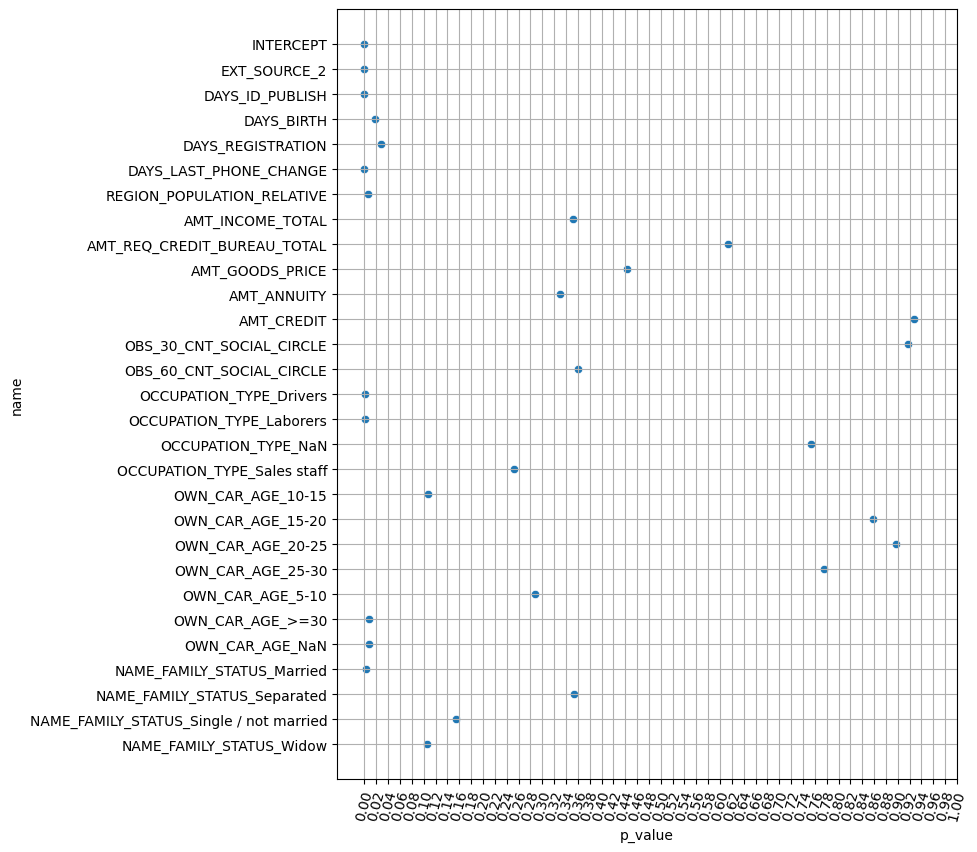

In [18]:
plt.figure(figsize=(8,10))
ax = plt.subplot(1,1,1)
sax = sns.scatterplot(df_risultati, y='name', x='p_value')
ticks = ax.set_xticks(np.linspace(0.0,1.0,51))
ticks = plt.xticks(rotation=75)
plt.grid()

<AxesSubplot: >

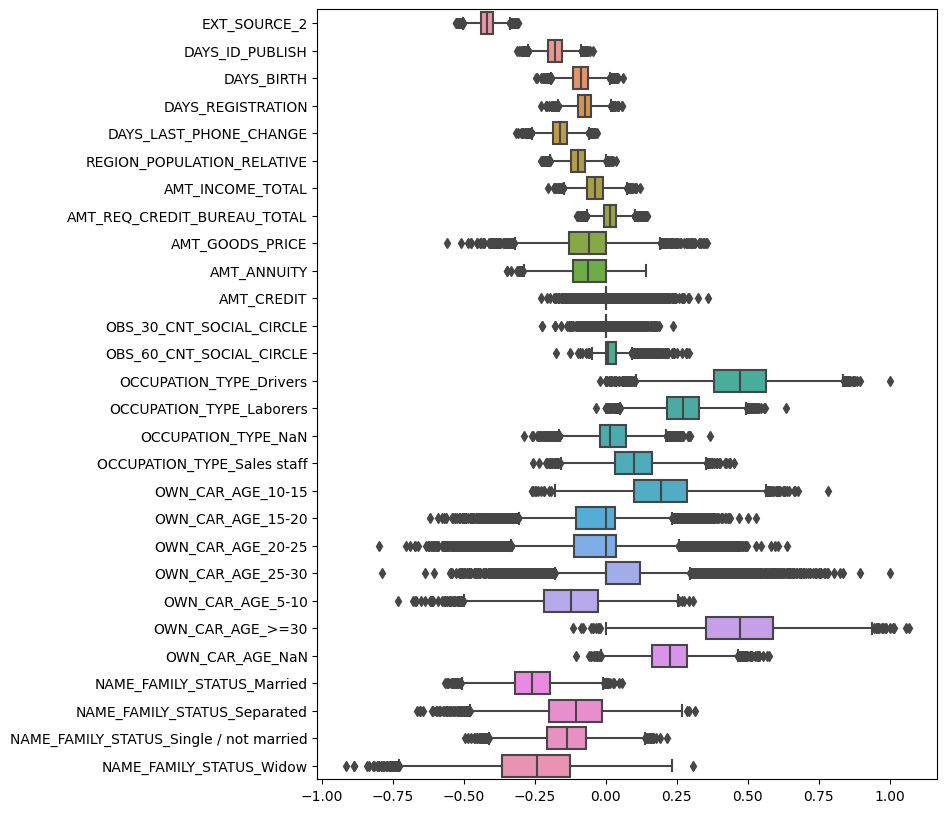

In [19]:
plt.figure(figsize=(8,10))
sns.boxplot(df_saved_results, orient='h')

In [20]:
np.sum(res['coefficienti']==0)

32852

In [21]:
df_risultati = df_risultati.iloc[1:,:]

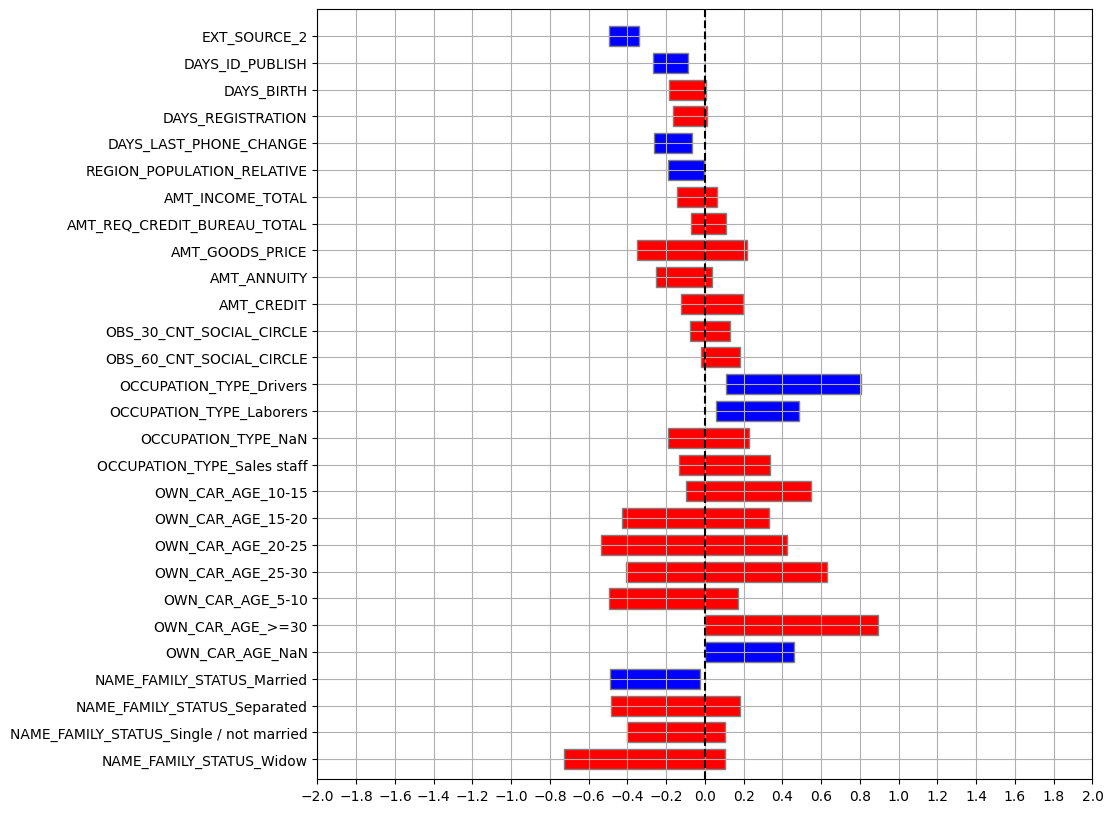

In [22]:
import time

plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
plt.xlim(left = -2, right = 2)
pos_rows = np.arange(0,len(df_risultati.index))
plt.ylim(bottom=-0.75, top=pos_rows[-1]+1.0)
i = 1
for row in df_risultati.index:    
    lci = df_risultati.loc[row, 'CI_left']
    rci = df_risultati.loc[row, 'CI_right']
    len_ci = rci - lci
    if lci*rci <= 0:
        col = 'red'
    else:
        col = 'blue'
    ax.add_patch(Rectangle((lci, pos_rows[-i] - 0.75/2), len_ci, 0.75,
             edgecolor = 'grey',
             facecolor = col,
             fill=True,
             lw=1))
    i += 1
    
    
plt.axvline(0, 0, pos_rows[-1]+0.75, linestyle='--', color='black')
plt.grid(axis='both')
plt.yticks(ticks=np.flip(pos_rows), labels=df_risultati.index.to_list())
plt.xticks(ticks=np.linspace(-2,2,21))
plt.show()

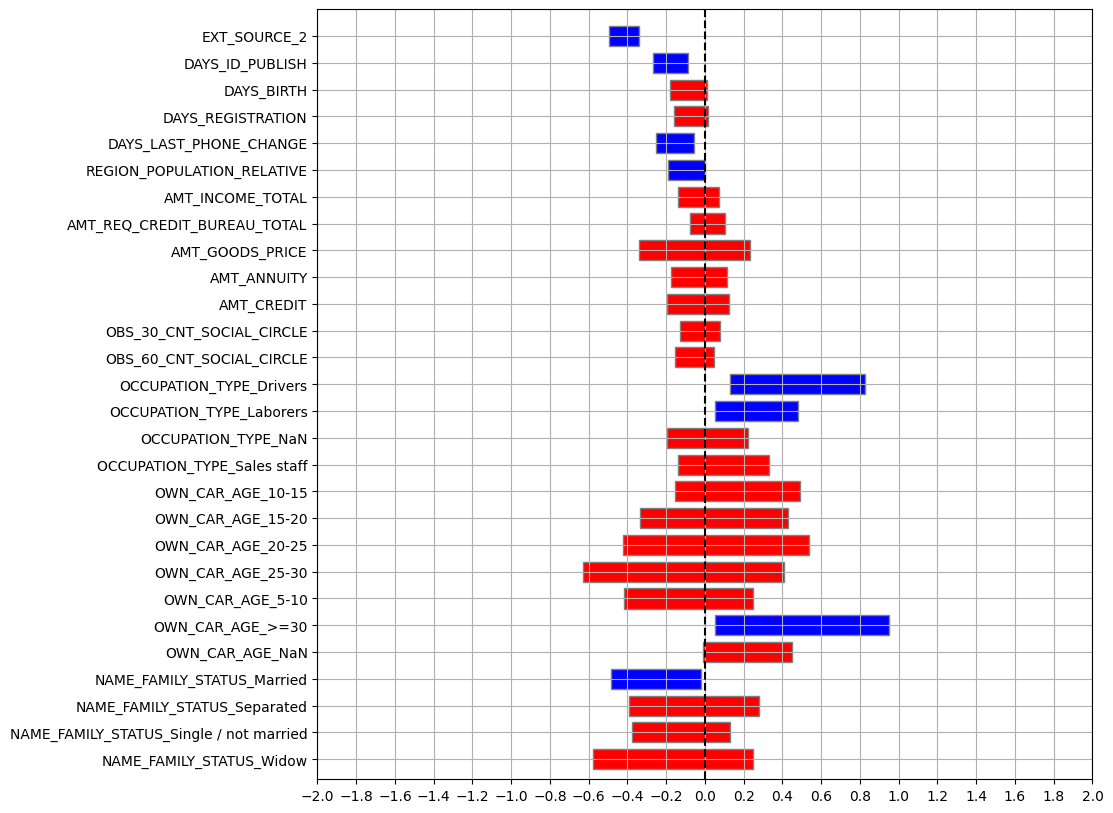

In [23]:
import time

plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
plt.xlim(left = -2, right = 2)
pos_rows = np.arange(0,len(df_risultati.index))
plt.ylim(bottom=-0.75, top=pos_rows[-1]+1.0)
i = 1
for row in df_risultati.index:    
    lci = df_risultati.loc[row, 'correct_CI_left']
    rci = df_risultati.loc[row, 'correct_CI_right']
    len_ci = rci - lci
    if lci*rci <= 0:
        col = 'red'
    else:
        col = 'blue'
    ax.add_patch(Rectangle((lci, pos_rows[-i] - 0.75/2), len_ci, 0.75,
             edgecolor = 'grey',
             facecolor = col,
             fill=True,
             lw=1))
    i += 1
    
    
plt.axvline(0, 0, pos_rows[-1]+0.75, linestyle='--', color='black')
plt.grid(axis='both')
plt.yticks(ticks=np.flip(pos_rows), labels=df_risultati.index.to_list())
plt.xticks(ticks=np.linspace(-2,2,21))
plt.show()

$$
\text{Confidence Interval} = \left[ 2\widehat{\beta}^{(j)} - \widehat{\beta^*}^{(j)}_{\alpha/{2}} , 2\widehat{\beta}^{(j)} - \widehat{\beta^*}^{(j)}_{1-\alpha/{2}} \right]
$$

$$
\overline{x}
$$